Path to dataset files: C:\Users\plui0\.cache\kagglehub\datasets\shayanfazeli\heartbeat\versions\1
Files in dataset folder:
['mitbih_test.csv', 'mitbih_train.csv', 'ptbdb_abnormal.csv', 'ptbdb_normal.csv']
Original shape: (99195, 187)
Dropping 54 columns with ≥80.0% zeros
Dropping 54 columns with ≥80.0% zeros
132    0.793014
131    0.785372
130    0.778285
129    0.769333
128    0.760048
127    0.750451
126    0.739201
125    0.726135
124    0.714361
123    0.700055
122    0.684994
121    0.668179
120    0.650890
119    0.634578
118    0.619890
117    0.603982
116    0.589364
115    0.576219
114    0.563889
113    0.551258
dtype: float64


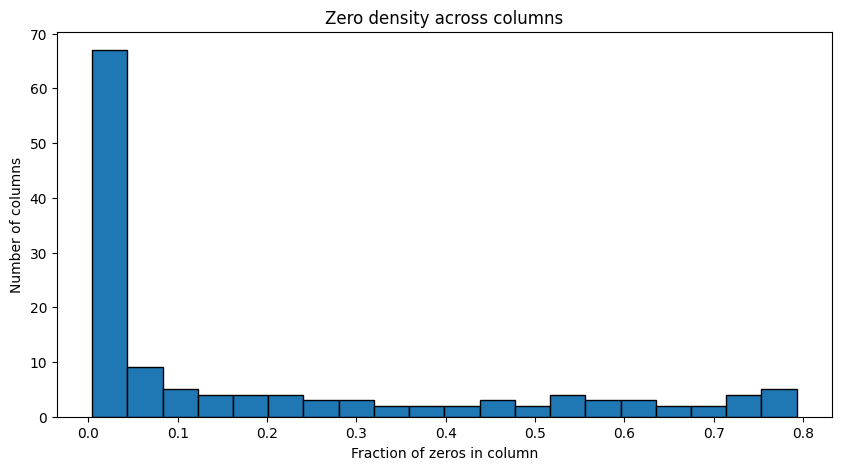

Columns with all zeros: []
Count: 0
Cleaned shape: (99195, 133)
Accuracy: 0.24843768898923518
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.17      0.29     18118
         1.0       0.13      0.49      0.21       556
         2.0       0.23      0.45      0.31      1448
         3.0       0.03      0.95      0.05       162
         4.0       0.49      0.72      0.59      1608
         6.0       0.09      0.70      0.15       834
         7.0       0.11      0.09      0.10      2077

    accuracy                           0.25     24803
   macro avg       0.28      0.51      0.24     24803
weighted avg       0.71      0.25      0.29     24803

Confusion Matrix:
 [[3169 1548 1606 4787  844 5123 1041]
 [  38  273   45  117   14   62    7]
 [  95   77  648  193  154  130  151]
 [   4    0    3  154    0    0    1]
 [  79   16   36   26 1153   82  216]
 [  24   64   58   71   16  585   16]
 [ 168  109  373  315  152  780  180]]

In [6]:
%run FeatureEngineering.ipynb

## import for naive bayes model 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Merge class 6 into 0 ("Normal"), rename 7 to 5 ("Abnormal")
y_train = np.where(y_train == 6, 0, y_train)
y_test = np.where(y_test == 6, 0, y_test)
y_train = np.where(y_train == 7, 5, y_train)
y_test = np.where(y_test == 7, 5, y_test)

unique_classes = np.unique(np.concatenate([y_train, y_test]))
num_classes = unique_classes.max() + 1

## naive bayes model 

In [9]:
gnb = GaussianNB()
train_test_split(X_train, y_train, test_size=0.2, random_state=42)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.3959198484054348
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.39      0.54     18952
         1.0       0.09      0.53      0.15       556
         2.0       0.23      0.45      0.30      1448
         3.0       0.03      0.95      0.05       162
         4.0       0.47      0.72      0.57      1608
         5.0       0.11      0.09      0.10      2077

    accuracy                           0.40     24803
   macro avg       0.30      0.52      0.28     24803
weighted avg       0.71      0.40      0.48     24803

Confusion Matrix:
 [[7388 2780 1686 4988  962 1148]
 [  80  292   45  118   14    7]
 [ 225   79  645  195  154  150]
 [   4    0    3  154    0    1]
 [ 161   16   36   26 1152  217]
 [ 780  237  373  342  156  189]]


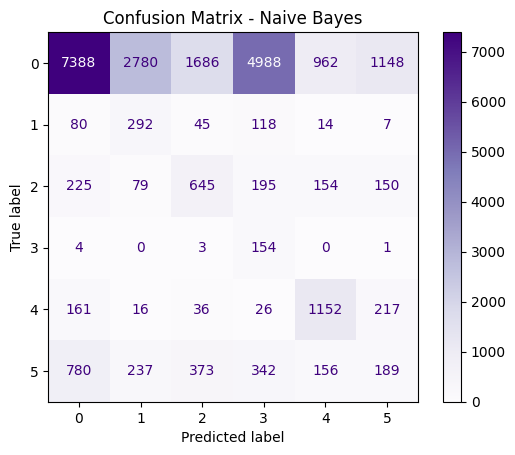

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display with purple colormap
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')  # Use 'Purples' for a purple-themed plot
plt.title("Confusion Matrix - Naive Bayes")
plt.show()